# Geometrical Methods in Machine Learning
## Homework 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA, FastICA

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
import pandas as pd

### Task 1: PCA, interpretation (2 points)

Consider Ozone Level dataset, https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection.

Apply PCA analysis to data to find PCA estimate of data dimensionality given by the number of variables explaining 80% and 95% of the variance.

Draw and interpret biplots of the first two principal components and top 5 features with the highest influence (largest absolute eigenvalue coefficient) to each first two principal components. Can you interpret the each of first two principal components in terms of original variables? Are there any meaningful groupings in the original variables?

Comment whether PCA is applicable to categorical variables, as well as your preprocessing strategy for them.

In [3]:
X, y = fetch_openml("ozone_level", return_X_y=True)
X

WSR0 WSR1 WSR2 WSR3 WSR4 WSR5 WSR6 WSR7 WSR8 WSR9  ...    T50  RH50  \
0     0.8  1.8  2.4  2.1    2  2.1  1.5  1.7  1.9  2.3  ...  -15.5  0.15   
1     2.8  3.2  3.3  2.7  3.3  3.2  2.9  2.8  3.1  3.4  ...  -14.5  0.48   
2     2.9  2.8  2.6  2.1  2.2  2.5  2.5  2.7  2.2  2.5  ...  -15.9   0.6   
3     4.7  3.8  3.7  3.8  2.9  3.1  2.8  2.5  2.4  3.1  ...  -16.8  0.49   
4     2.6  2.1  1.6  1.4  0.9  1.5  1.2  1.4  1.3  1.4  ...      ?     ?   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   ...   
2531  0.3  0.4  0.5  0.5  0.2  0.3  0.4  0.4  1.3  2.2  ...  -12.4  0.07   
2532    1  1.4  1.1  1.7  1.5  1.7  1.8  1.5  2.1  2.4  ...    -12  0.04   
2533  0.8  0.8  1.2  0.9  0.4  0.6  0.8  1.1  1.5  1.5  ...  -11.8  0.06   
2534  1.3  0.9  1.5  1.2  1.6  1.8  1.1    1  1.9    2  ...  -10.8  0.25   
2535  1.5  1.3  1.8  1.4  1.2  1.7  1.6  1.4  1.6    3  ...  -11.9  0.54   

        U50    V50  HT50     KI     TT    SLP SLP_ Precp  
0     10.67  -1.56  5795  -12.1   17.9  10330  -55     0  
1      8.39   3.84  5805  14.05     29  10275  -55     0  
2      6.94    9.8  5790   17.9   41.3  10235  -40     0  
3      8.73  10.54  5775  31.15   51.7  10195  -40  2.08  
4         ?      ?     ?      ?      ?      ?    ?  0.58  
...     ...    ...   ...    ...    ...    ...  ...   ...  
2531   7.93  -4.41  5800  -25.6   21.8  10295   65     0  
2532   5.95  -1.14  5845  -19.4   19.1  10310   15     0  
2533    7.8  -0.64  5845   -9.6   35.2  10275  -35     0  
2534   7.72  -0.89  5845  -19.6   34.2  10245  -30  0.05  
2535  13.07   9.15  5820   1.95  39.35  10220  -25     0  

[2536 rows x 72 columns]

#### preprocessing step

PCA is not applicable to categorical variables since it is designed to be used with numerical or continuous variables. However, PCA may be used on categorical data by converting them into a set of binary variables with values of 0 and 1. This may be done by using a one-hot encoding approach on the category variables. However, PCA is more effective when working with numerical or continuous variables. In our particular dataset, all 72 variables are categorical, and therefore it would not be appropriate to use this method. Furthermore, since the original dataset consists of continuous variables, I have preprocessed the data by converting all variables to float, filling in any missing values with the corresponding mean value for each variable, and then standardize the data.

In [4]:
cols = X.columns
col_nan = []

for col in cols:
    X[col] = X[col].astype(str)  
    list_x = X[col]

    list_x_float = list_x[list_x != '?']
    list_x_float = list_x_float.astype(float)
    mean_x = np.mean(list_x_float)

    col_nan.append((col, len(list_x[list_x == '?'])))

    list_x[list_x == '?'] = mean_x

    list_x = list_x.astype(float)
    X[col] = list_x

In [5]:
X_ori = X.copy()

In [426]:
# all missing values in each variable (before applying mean)
col_nan[:5]

[('WSR0', 299), ('WSR1', 292), ('WSR2', 294), ('WSR3', 292), ('WSR4', 293)]

In [427]:
X.describe()

WSR0         WSR1         WSR2         WSR3         WSR4  \
count  2536.000000  2536.000000  2536.000000  2536.000000  2536.000000   
mean      1.641261     1.587433     1.546610     1.527273     1.523094   
std       1.195016     1.191897     1.165916     1.134013     1.127323   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.800000     0.700000     0.700000     0.700000     0.700000   
50%       1.600000     1.500000     1.400000     1.400000     1.400000   
75%       2.200000     2.100000     2.100000     2.100000     2.000000   
max       7.500000     7.700000     7.100000     7.300000     7.200000   

              WSR5         WSR6         WSR7         WSR8         WSR9  ...  \
count  2536.000000  2536.000000  2536.000000  2536.000000  2536.000000  ...   
mean      1.542914     1.638218     2.048331     2.540472     2.848599  ...   
std       1.102666     1.092947     1.092559     1.115968     1.150000  ...   
min       0.000000     0.000000     0.000000     0.100000     0.100000  ...   
25%       0.700000     0.800000     1.300000     1.800000     2.100000  ...   
50%       1.400000     1.600000     2.048331     2.540472     2.848599  ...   
75%       2.000000     2.100000     2.600000     3.200000     3.500000  ...   
max       7.400000     7.400000     7.500000     9.200000     8.500000  ...   

               T50         RH50          U50          V50         HT50  \
count  2536.000000  2536.000000  2536.000000  2536.000000  2536.000000   
mean    -10.508261     0.304670     9.867313     0.831892  5818.898515   
std       3.793305     0.242839     9.125798     7.041611    77.428109   
min     -24.800000     0.010000   -14.920000   -25.990000  5480.000000   
25%     -13.200000     0.100000     3.130000    -3.340000  5773.750000   
50%     -10.400000     0.250000     9.867313     0.831892  5827.500000   
75%      -7.400000     0.460000    16.092500     4.380000  5880.000000   
max      -1.700000     1.000000    42.360000    30.420000  5965.000000   

                KI           TT           SLP         SLP_        Precp  
count  2536.000000  2536.000000   2536.000000  2536.000000  2536.000000  
mean     10.510813    37.388366  10164.180664    -0.130416     0.371732  
std      20.146633    10.946795     51.419539    34.683179     1.316960  
min     -56.700000   -10.100000   9975.000000  -135.000000     0.000000  
25%      -2.412500    33.175000  10130.000000   -20.000000     0.000000  
50%      13.000000    40.500000  10160.000000    -0.130416     0.000000  
75%      27.712500    44.950000  10190.000000    15.000000     0.050000  
max      42.050000    59.150000  10350.000000   140.000000    20.650000  

[8 rows x 72 columns]

In [428]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [429]:
X_std

array([[-0.70411306,  0.17837853,  0.73209217, ...,  3.22546727,
        -1.58233491, -0.28232125],
       [ 0.96983446,  1.35320868,  1.50416951, ...,  2.155624  ,
        -1.58233491, -0.28232125],
       [ 1.05353183,  1.01754292,  0.90366491, ...,  1.37755618,
        -1.14976331, -0.28232125],
       ...,
       [-0.70411306, -0.66078587, -0.29734429, ...,  2.155624  ,
        -1.00557277, -0.28232125],
       [-0.28562618, -0.57686943, -0.03998517, ...,  1.57207313,
        -0.86138224, -0.24434753],
       [-0.11823143, -0.24120367,  0.21737394, ...,  1.08578074,
        -0.7171917 , -0.28232125]])

#### perform PCA

In [430]:
pca = PCA()
pca.fit(X_std)

# find cumulative explained variance
EV = pca.explained_variance_ratio_
CEV = np.cumsum(EV)

In [431]:
CEV

array([0.41819825, 0.62183588, 0.69630449, 0.74119937, 0.77915   ,
       0.80640867, 0.82893231, 0.8450886 , 0.8602332 , 0.87344605,
       0.886152  , 0.89729248, 0.90765031, 0.91721376, 0.92510625,
       0.932802  , 0.9394663 , 0.94474967, 0.94944741, 0.9535919 ,
       0.95761651, 0.96124335, 0.96456824, 0.96752301, 0.97019524,
       0.97270958, 0.97495359, 0.97700034, 0.97893441, 0.98068699,
       0.98230759, 0.98385477, 0.98536306, 0.98666049, 0.98792321,
       0.98905616, 0.99008128, 0.99106044, 0.99203139, 0.99296179,
       0.99386192, 0.9946625 , 0.99540525, 0.99608387, 0.99670231,
       0.99731293, 0.99784826, 0.9981546 , 0.9983918 , 0.99862363,
       0.99882626, 0.99900746, 0.99915439, 0.99927034, 0.99937457,
       0.99946771, 0.99954193, 0.99960767, 0.99966162, 0.99970492,
       0.9997472 , 0.99978529, 0.99982253, 0.99985633, 0.99988603,
       0.99991028, 0.99993199, 0.99995086, 0.99996683, 0.99998114,
       0.99999234, 1.        ])

In [432]:
# The number of variables explaining 80% and 95% of the variance
n_var_80 = np.argmax(CEV >= 0.80) + 1
n_var_90 = np.argmax(CEV >= 0.90) + 1   # check for the task 2
n_var_95 = np.argmax(CEV >= 0.95) + 1
n_var_99 = np.argmax(CEV >= 0.99) + 1   # check for the task 2

print(f'* The number of variables explaining 80% of the variance: {n_var_80}')
print(f'* The number of variables explaining 90% of the variance: {n_var_90}')
print(f'* The number of variables explaining 95% of the variance: {n_var_95}')
print(f'* The number of variables explaining 99% of the variance: {n_var_99}')

* The number of variables explaining 80% of the variance: 6
* The number of variables explaining 90% of the variance: 13
* The number of variables explaining 95% of the variance: 20
* The number of variables explaining 99% of the variance: 37


* The number of variables explaining 80% of the variance: 6
* The number of variables explaining 95% of the variance: 20


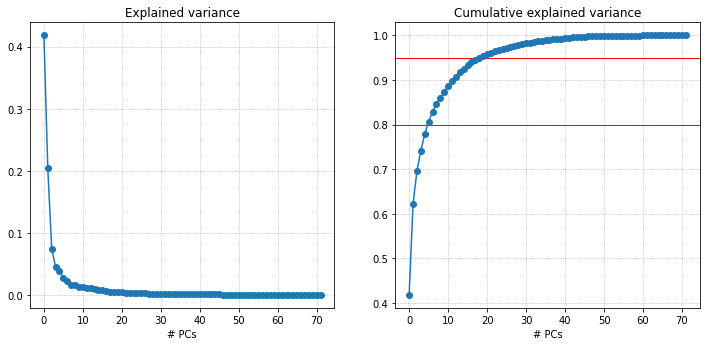

In [433]:
# plot EV/CEV
print(f'* The number of variables explaining 80% of the variance: {n_var_80}')
print(f'* The number of variables explaining 95% of the variance: {n_var_95}')

fig = plt.figure(figsize=(12,5.25))

plt.subplot(121)
plt.title("Explained variance")
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(EV, "o-")

plt.subplot(122)
plt.title("Cumulative explained variance")
plt.axhline(linewidth=1, y=0.95, color='r')
plt.axhline(linewidth=1, y=0.8, color='r')
plt.xlabel("# PCs")
plt.grid(linestyle="dotted")
plt.plot(CEV, "o-");

The PCA estimate of data dimensionality suggests that 6 variables are needed to explain 80% of the variance, and 20 variables are needed to explain 95% of the variance.

#### draw and interpret biplots 

In [434]:
# set eigenvectors to project data to
pc1, pc2 = 0, 1
eigenvector_x = pca.components_[pc1]
eigenvector_y = pca.components_[pc2]

# project data into PC space
xs = pca.transform(X_std)[:,pc1]
ys = pca.transform(X_std)[:,pc2]

# set feature name and top 5 features for first two principle components
feature_names = X.columns.tolist()
argsort_abs_eig = np.abs(pca.components_).argsort()
reversed_to_max = argsort_abs_eig[:, ::-1]
top_5_features = reversed_to_max[:, :5][:2]

print(f'Top 5 features for the first subspace are: {[feature_names[top_5_features[0][i]] for i in range(5)]}.')
print(f'Top 5 features for the second subspace are: {[feature_names[top_5_features[1][j]] for j in range(5)]}.')

Top 5 features for the first subspace are: ['T_AV', 'T9', 'T10', 'T19', 'T_PK'].
Top 5 features for the second subspace are: ['WSR_AV', 'WSR_PK', 'WSR10', 'WSR7', 'WSR11'].


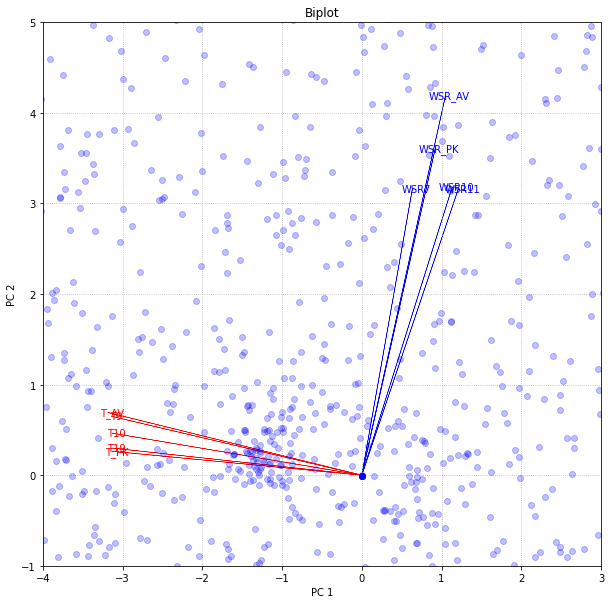

In [435]:
# visualize projections
plt.figure(figsize=(10,10))

# arrows project features (ie columns from csv) as vectors onto PC axes
for i, feature in enumerate(feature_names):
    if i in top_5_features[0]:
        plt.arrow(0, 0, eigenvector_x[i] * max(xs), eigenvector_y[i] * max(ys), color='r', linewidth=0.5)
        plt.text(eigenvector_x[i] * max(xs) + 0.05, eigenvector_y[i] * max(ys), feature, color='r', ha='center', va='center')
    elif i in top_5_features[1]:
        plt.arrow(0, 0, eigenvector_x[i] * max(xs), eigenvector_y[i] * max(ys), color='b', linewidth=0.5)
        plt.text(eigenvector_x[i] * max(xs) + 0.05, eigenvector_y[i] * max(ys), feature, color='b', ha='center', va='center')

# circles project documents (ie rows from csv) as points onto PC axes
for i in range(xs.shape[0]):
    plt.plot(xs[i], ys[i], 'bo', alpha=0.25)

plt.title("Biplot")
plt.xlabel("PC " + str(pc1 + 1))
plt.ylabel("PC " + str(pc2 + 1))
plt.xlim((-4, 3))
plt.ylim((-1, 5))
plt.grid(linestyle="dotted")
plt.show()

Top 5 features for the first principal components are: 
- T_AV : average temperature
- T9 : the temperature measured at time 9.00
- T10 : the temperature measured at time 10.00
- T19 : the temperature measured at time 19.00
- T_PK : peak temperature

Top 5 features for the second principal components are: 
- WSR_AV : average wind speed
- WSR_PK : peak wind speed
- WSR10 : the wind speed measured at time 10.00
- WSR7 : the wind speed measured at time 7.00
- WSR11 : the wind speed measured at time 11.00

As you can see from top 5 features of the first two principle components, they are all from the same group. For the first subspace, the most important features are from temperature while the second subspace are from wind speed.

**The projection of the red vectors or temperature features is maximum along PCA1 while the projrction of blue vactors or wind speed features is maximum along PCA2.**

**There is very less corelation between temperature and wind speed features and there is very hight corelation within wind speed features or temperature features. That implies it has clustered the features into 2 groups.**

---

### Task 2: PCA, classification (2 points)

Consider the classification problem of predicting the target variable `y` of eight vs one hour peak data subset. Apply a classifier of your choice on raw data and PCA-reduced data for specified explained variance level. Conclude whether applying PCA was able to improve the classification results.

Perform a feature selection, selecting top 5 performing features, with any technique you know, compare them with top 5 features influencing the first two principal components.

In [6]:
# your code here

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.ensemble import ExtraTreesClassifier

In [7]:
y.value_counts()

0.0    2463
1.0      73
Name: Class, dtype: int64

In [8]:
# use data after preprocessing
X_ori.head(5)

WSR0  WSR1  WSR2  WSR3  WSR4  WSR5  WSR6  WSR7  WSR8  WSR9  ...        T50  \
0   0.8   1.8   2.4   2.1   2.0   2.1   1.5   1.7   1.9   2.3  ... -15.500000   
1   2.8   3.2   3.3   2.7   3.3   3.2   2.9   2.8   3.1   3.4  ... -14.500000   
2   2.9   2.8   2.6   2.1   2.2   2.5   2.5   2.7   2.2   2.5  ... -15.900000   
3   4.7   3.8   3.7   3.8   2.9   3.1   2.8   2.5   2.4   3.1  ... -16.800000   
4   2.6   2.1   1.6   1.4   0.9   1.5   1.2   1.4   1.3   1.4  ... -10.508261   

      RH50        U50        V50         HT50         KI         TT  \
0  0.15000  10.670000  -1.560000  5795.000000 -12.100000  17.900000   
1  0.48000   8.390000   3.840000  5805.000000  14.050000  29.000000   
2  0.60000   6.940000   9.800000  5790.000000  17.900000  41.300000   
3  0.49000   8.730000  10.540000  5775.000000  31.150000  51.700000   
4  0.30467   9.867313   0.831892  5818.898515  10.510813  37.388366   

            SLP       SLP_  Precp  
0  10330.000000 -55.000000   0.00  
1  10275.000000 -55.000000   0.00  
2  10235.000000 -40.000000   0.00  
3  10195.000000 -40.000000   2.08  
4  10164.180664  -0.130416   0.58  

[5 rows x 72 columns]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_ori, y, stratify=y, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train[x_train.columns])

cols = X_ori.columns
x_train[cols] = scaler.transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

#### apply Logistic regression on raw data

In [10]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)

pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)

print(f'Accuracy on train set: {round(acc_train, 4)} \nAccuracy on test set: {round(acc_test, 4)}')

Accuracy on train set: 0.9779 
Accuracy on test set: 0.9653


#### PCA-reduced data

Test on different n_components to see the effect of n_components to accuracy score

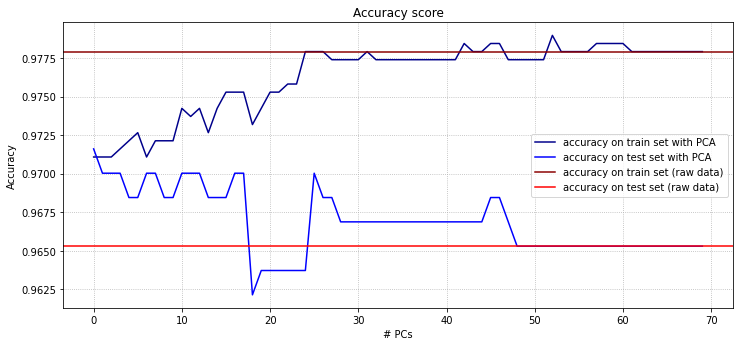

In [11]:
acc_train_pca_list = []
acc_test_pca_list = []

for i in range(2, x_train.shape[1]):
    pca = PCA(n_components=i)
    pca.fit(x_train)

    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)

    clf = LogisticRegression(random_state=42)
    clf.fit(x_train_pca, y_train)

    pred_train_pca = clf.predict(x_train_pca)
    pred_test_pca = clf.predict(x_test_pca)

    acc_train_pca = accuracy_score(pred_train_pca, y_train)
    acc_test_pca = accuracy_score(pred_test_pca, y_test)

    acc_train_pca_list.append(acc_train_pca) 
    acc_test_pca_list.append(acc_test_pca)

# Accuracy plot
fig = plt.figure(figsize=(12,5.25))

plt.title("Accuracy score")
plt.xlabel("# PCs")
plt.ylabel('Accuracy')
plt.grid(linestyle="dotted")

plt.plot(acc_train_pca_list, 'darkblue', label='accuracy on train set with PCA')
plt.plot(acc_test_pca_list, 'b', label='accuracy on test set with PCA')

plt.axhline(y=acc_train, color='darkred', label='accuracy on train set (raw data)')
plt.axhline(y=acc_test, color='r', label='accuracy on test set (raw data)')

plt.legend()
plt.show()


As from the graph shown above, I select `n_components` = 27 since it can give the high accucacy score on test set and train set. 

In [12]:
pca = PCA()
pca.fit(x_train)

# find cumulative explained variance
EV = pca.explained_variance_ratio_
CEV = np.cumsum(EV)
CEV[27-1]

0.9750793290043156

Using `n_components` = 27 can explaining 97.51% of the variance!

Apply this to the data agin to see the results

In [16]:
pca = PCA(n_components=27)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

clf = LogisticRegression(random_state=42)
clf.fit(x_train_pca, y_train)

pred_train_pca = clf.predict(x_train_pca)
pred_test_pca = clf.predict(x_test_pca)

acc_train_pca = accuracy_score(pred_train_pca, y_train)
acc_test_pca = accuracy_score(pred_test_pca, y_test)

print(f'n_components = {27} \n * Accuracy on train set: {round(acc_train_pca, 4)} \n * Accuracy on test set: {round(acc_test_pca, 4)} \n')    

n_components = 27 
 * Accuracy on train set: 0.9779 
 * Accuracy on test set: 0.97 



When compared to training Logistic regression with raw data, the accuracy score on the test set of using PCA (n_components = 27) is better while the accuracy on train set is the same. 

**So, applying PCA is able to improve the classification results**  

#### Perform a feature selection

In [444]:
# apply feature selection from scikit-learn 
clf = ExtraTreesClassifier(n_estimators=5, random_state=42)
clf = clf.fit(X_ori, y)
feat_imp = clf.feature_importances_
feat_imp_series = pd.Series(feat_imp, index=cols)
feat_imp_series.nlargest(5)

WSR9     0.042437
WSR10    0.031351
RH50     0.029373
T5       0.027192
T_PK     0.025845
dtype: float64

ExtraTreesClassifier from scikit-learn suggests top 5 performing features: 
- WSR9 : wind speed at time 9.00
- WSR10 : wind speed at time 10.00
- RH50 : relative humidity at 500 hpa
- T5 : temperature measured at time 5.00
- T_PK : peak temperature

Two important features (WSR9 and WSR10) are from the wind speed group, two from the temperature group (T5 and T_PK), and one from the relative humidity group.

**When comparing to top 5 features influencing the first two principal components, there are the same important features which are T_PK (from first principal component) and WSR10 (from second principal component). We can imply that PCA method can suggest the important features**

---

### Task 3: ICA, optimization (2 points)

Implement ICA solution with the (projected) gradient descent optimization scheme, using one of the following loss functions (see Lecture 3 slides):

- kurtosis, or
- negative entropy, or
- mutual information.

To which classes of the approaches to the solution of ICA problem those loss functions belong to?

Apply ICA using obtained optimization procedure to the mixture of $X_1 \sim Laplace(0,1)$ and $X_2 \sim U(0,1)$ used in Seminar 2.

In [445]:
# your code here

from scipy.linalg import fractional_matrix_power as matrix_power

In [469]:
# sample size and dimensionality
n, d = 1000, 2

X_1 = np.random.laplace(0, 0.5, (n))
X_2 = np.random.uniform(-np.sqrt(3),np.sqrt(3), (n))

X = np.vstack([X_1, X_2])
X.shape

(2, 1000)

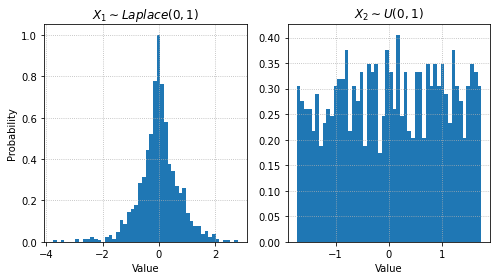

In [470]:
fig = plt.figure(figsize=(8,4))

plt.subplot(121)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.grid(linestyle="dotted")
plt.title("$X_1 \sim Laplace(0,1)$")
plt.hist(X_1, bins=50, density=True)

plt.subplot(122)
plt.grid(linestyle="dotted")
plt.title("$X_2 \sim U(0,1)$")
plt.xlabel("Value")
plt.hist(X_2, bins=50, density=True)

plt.show()

Initial sources:
 [[-0.61777992 -0.06117102 -1.41786854 ...  1.20808843 -0.70147017
   0.10535662]
 [ 0.1852797   1.25675649  0.66924171 ...  1.07790029 -0.35224081
   1.65071711]]

Initial mean:
 [ 0.2638626  -0.34698047]

Mixing matrix:
 [[-1.00110558  1.77385735]
 [-1.87251498 -0.52047928]]

Mixed data:
 [[ 1.21098527  2.55440798  2.87043802 ...  0.9664799   0.34128335
   3.08652618]
 [ 0.71338743 -0.88655255  1.95967316 ... -3.17016893  1.14986697
  -1.40342637]]


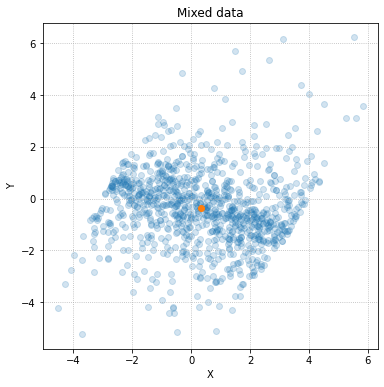

In [471]:
# set random mean
mean = np.random.normal(0, 0.5, d)

# create random mixing matrix, 2 x 2
M = np.random.normal(0, 1, (d, d))

# mix initial sources and add mean.
Y = M @ X + mean.reshape((2, 1))

print("Initial sources:\n", X)
print("\nInitial mean:\n", mean)
print("\nMixing matrix:\n", M)
print("\nMixed data:\n", Y)

# plot
fig = plt.figure(figsize=(6,6))

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(linestyle="dotted")
plt.title("Mixed data")
plt.scatter(Y[0], Y[1], alpha=0.2)
plt.scatter(np.mean(Y.T, axis=0)[0], np.mean(Y.T, axis=0)[1], alpha=1)

plt.show()

In [472]:
def white(data):
    x_mean = np.mean(data, axis=1)
    data_centered = data - x_mean.reshape((2, 1))
    covariance = data_centered.dot(data_centered.T) / n
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    W = eigenvectors.dot(matrix_power(np.diag(eigenvalues), -0.5)).dot(eigenvectors.T)
    return np.dot(W, data_centered), data_centered, W

In [473]:
Y_white, Y_centered, W = white(Y)
Y_white.shape, Y_centered.shape

((2, 1000), (2, 1000))

In [474]:
Y_white.dot(Y_white.T)

array([[1.00000000e+03, 4.61852778e-14],
       [4.61852778e-14, 1.00000000e+03]])

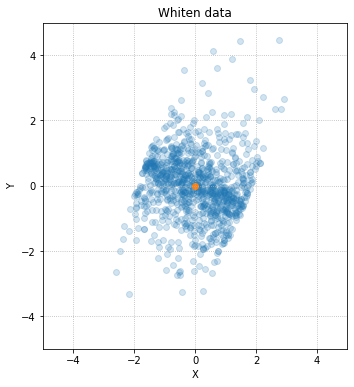

In [475]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(linestyle="dotted")
plt.title("Whiten data")
plt.scatter(Y_white[0], Y_white[1], alpha=0.2)
plt.scatter(np.mean(Y_white, axis=1)[0], np.mean(Y_white, axis=1)[1], alpha=1)

plt.show()

**Negentropy approximation**

From lecture 3,

$$ J(w^T \mathbf{X}) \approx \{ E\{log \text{ } cosh(w^T \mathbf{X})\} - E\{\xi_{Gauss(0,1)}\} \} ^2 $$



In [476]:
def NegEntropy(mat):
    log_cosh = np.log(np.cosh(mat))
    guass = np.log(np.cosh(np.random.normal(0, 1, mat.shape))) 
    return (np.mean(log_cosh) - np.mean(guass))**2

In [477]:
# ICA

def f(x):
    return np.tanh(x)

def f_grad(x):
    return 1 - (f(x) * 2)

def Update_w(w, X):
    wT_X =  np.dot(w.T, X)
    w_p = (X * f(wT_X)).mean(axis=1) - f_grad(wT_X).mean() * w   
    w_p /= np.linalg.norm(w_p)
    return w_p

def ica(X, iterations, tolerance=1e-4):
    num_components = X.shape[0]
    W = np.zeros((num_components, num_components), dtype=X.dtype)
    
    for i in range(num_components):
        w = np.random.rand(num_components)

        for j in range(iterations):
            w_new = Update_w(w, X)
            if(i >= 1):
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])

            # calculate loss
            loss_fn = NegEntropy(w.T @ X)
            
            # update w
            w = w_new

            if((loss_fn < tolerance) | (j == (iterations-1))):
                print(f'Convergence for component : {i+1}')
                print(f'Converge at step: {j}, loss : {loss_fn}\n')
            
                break;
                
            distances[i].append(loss_fn)

        W[i, :] = w

    S = np.dot(W, X)
    
    return S, distances

S, distances = ica(Y_white, iterations=5000)


Convergence for component : 1
Converge at step: 32, loss : 6.124120811853561e-06

Convergence for component : 2
Converge at step: 6, loss : 2.4204002346073352e-05



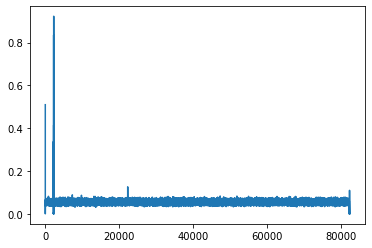

In [478]:
plt.plot(distances[0])

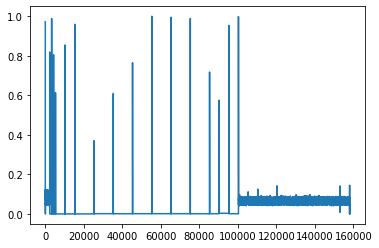

In [479]:
plt.plot(distances[1])

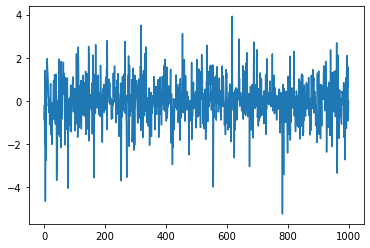

In [480]:
plt.plot(S[0])

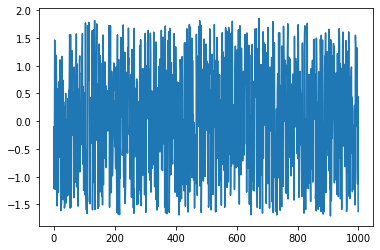

In [481]:
plt.plot(S[1])

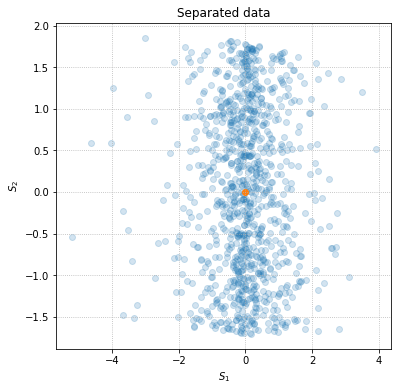

In [482]:
fig = plt.figure(figsize=(6,6))

plt.xlabel("$S_1$")
plt.ylabel("$S_2$")
plt.grid(linestyle="dotted")
plt.title("Separated data")
plt.scatter(S[0], S[1], alpha=0.2)
plt.scatter(np.mean(S, axis=1)[0], np.mean(S, axis=1)[1], alpha=1)

plt.show()

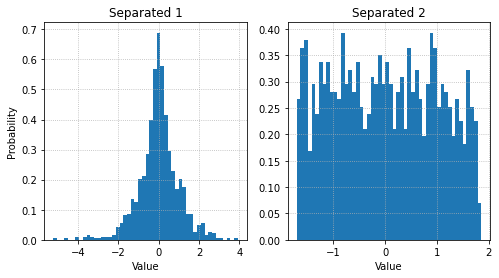

In [483]:
fig = plt.figure(figsize=(8,4))

plt.subplot(121)
plt.xlabel("Value")
plt.ylabel("Probability")
plt.grid(linestyle="dotted")
plt.title("Separated 1")
plt.hist(S[0], bins=50, density=True)

plt.subplot(122)
plt.grid(linestyle="dotted")
plt.title("Separated 2")
plt.xlabel("Value")
plt.hist(S[1], bins=50, density=True)

plt.show()

---

### Task 4: ICA, signal separation and reconstruction (2 points)

Consider the EEG dataset ``hw1/data/EEG.npy`` consisting of brain electrical activity of dimension $d=10001$ measured over time via $m=64$ electrodes. In EEG every single electrode captures activity not only in the direct vicitity, but in the neighboring areas as well, so we can of think of every electode signal as a linear mixture of local and neighboring activity, thus suiting the ICA model:

$$\mathbf{X} = \mathbf{A}\mathbf{S}$$

where $\mathbf{S} \in \mathbb{R}^{n \times d}$ - $n$ source signals of dimension $d$, $\mathbf{X} \in \mathbb{R}^{m \times d}$ - $m$ observations of dimension $d$, $\mathbf{A}$ - $m \times n$ mixing matrix, where $m \geq n, \mathrm{Rank}(\mathbf{A}) = n$.

Along with the normal brain activity, the signal may contain various artifacts, like eye blinks, seen as rapid and high amplitude noise corrupting the signal.

The task is to separate the signal from noise, given by ICA components having blinks. Find $n=40$ sources using `FastICA` from sklearn. Handpick the sources contaning blinks and remove them while reconstucting the the signals back from sources, not having the blinks. You can additionally preprocess the data with `PCA` reducing the number of signals to $m_{PCA}=48$.

**Note:** the key for the reconstruction is the mixing matrix $\mathbf{A}$, it can be found via ``ica.mixing_``.

In [2]:
X = np.load("./data/EEG.npy")

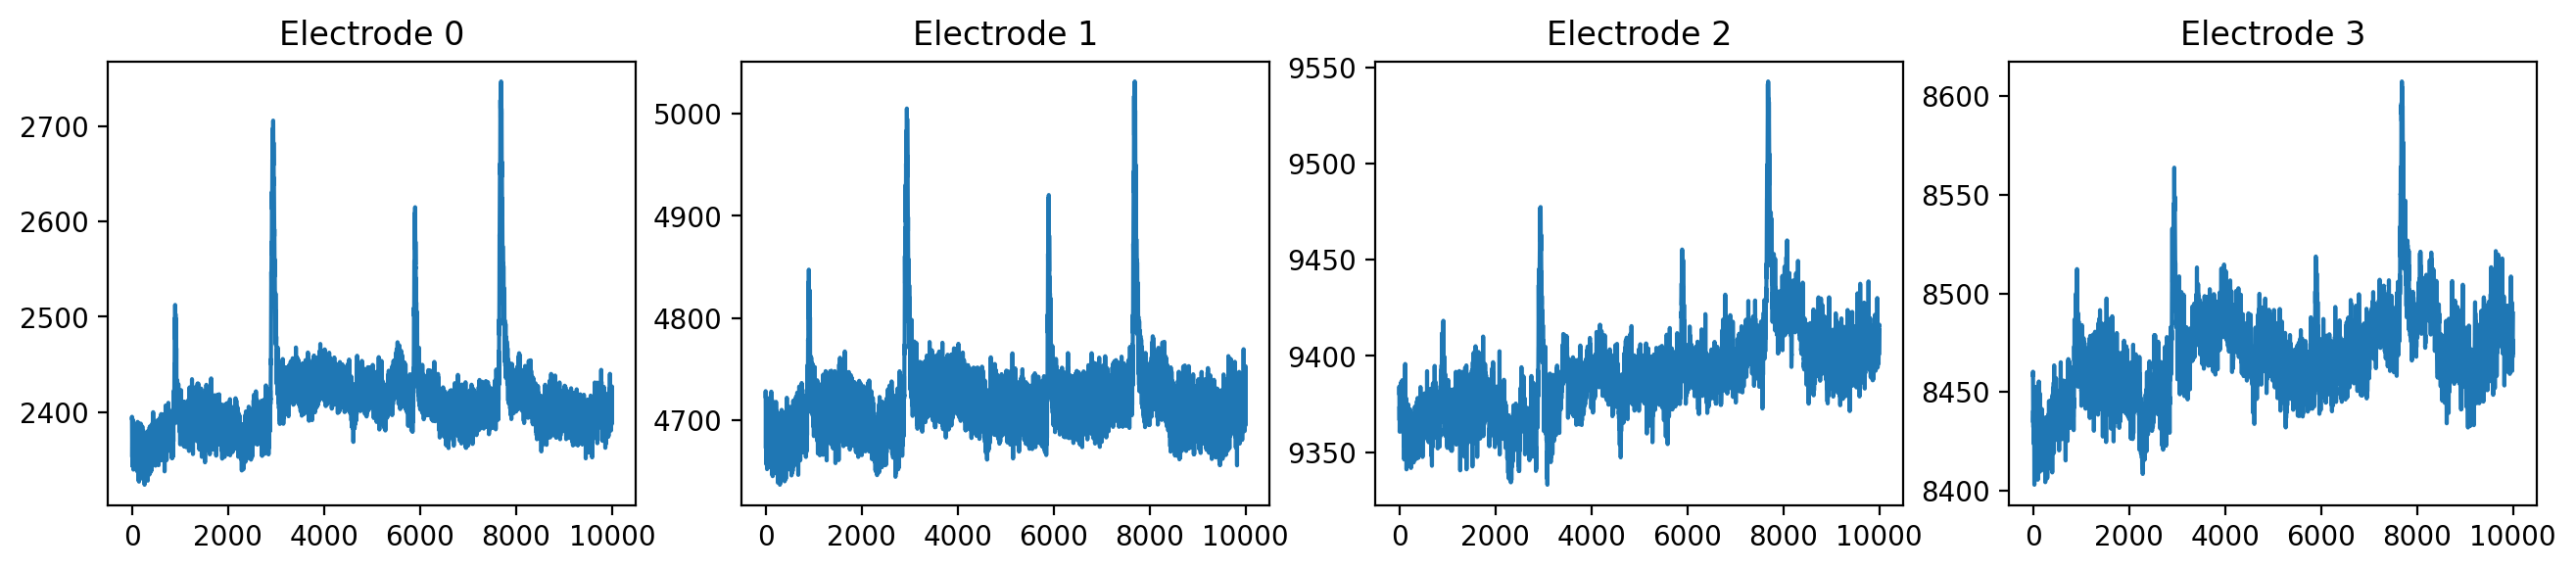

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3), dpi=200)
for j in range(4):
    ax[j].set_title("Electrode {}".format(j))
    ax[j].plot(X[:,j])
plt.show()

In [4]:
# preprocessing
pca = PCA(n_components=48)
data_pca = pca.fit_transform(X)

# find cumulative explained variance
EV = pca.explained_variance_ratio_
CEV = np.cumsum(EV)

print(f'n_components = 48 can explain {round(CEV[-1]*100, 2)}% of variance.')

n_components = 48 can explain 99.93% of variance.


In [5]:
# apply ICA 
ica = FastICA(n_components=40)
sources = ica.fit_transform(data_pca)
sources.shape

(10001, 40)

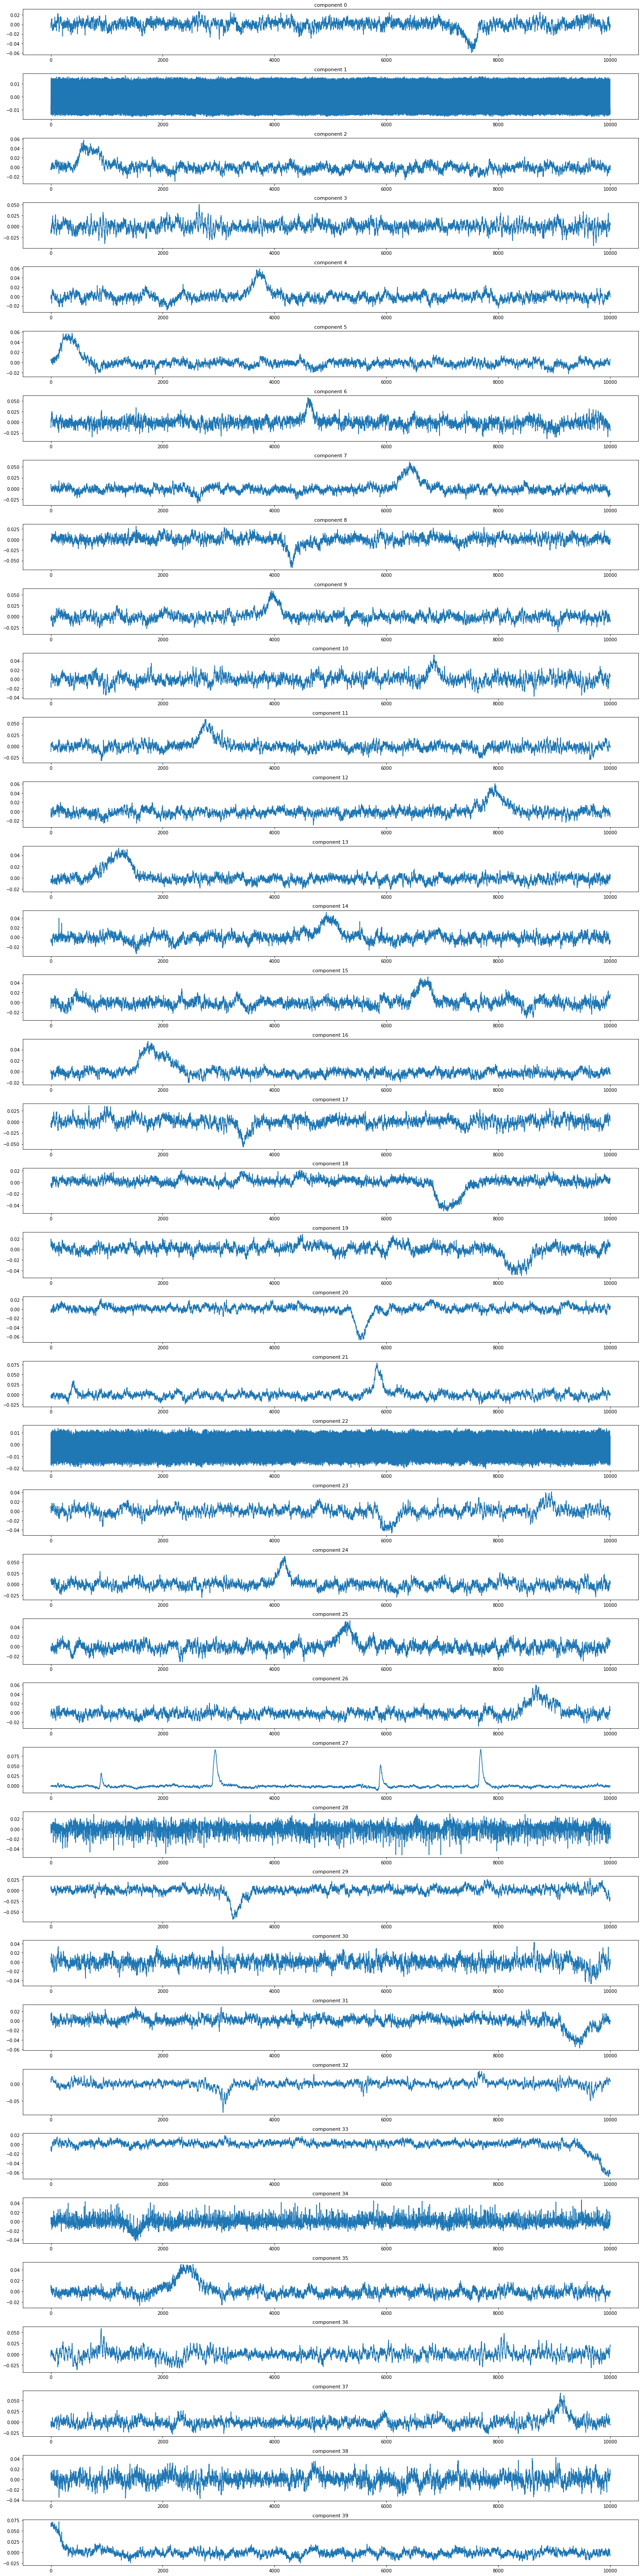

In [6]:
fig, ax = plt.subplots(40, 1, figsize=(20, 80))
for j in range(0, 40):
    ax[j].set_title("component {}".format(j), fontsize=11)
    ax[j].plot(sources[:,j])

fig.tight_layout()
plt.show()

In [7]:
# As from the graphs above, consider the blink signal should be 27th-component.

sources[:, [27]] = 0
sources.shape

(10001, 40)

In [8]:
# Reconstruct the signals without blink signal
mixing_matrix = ica.mixing_
reconstructed_data = np.dot(sources, mixing_matrix.T)
reconstructed_data.shape


(10001, 48)

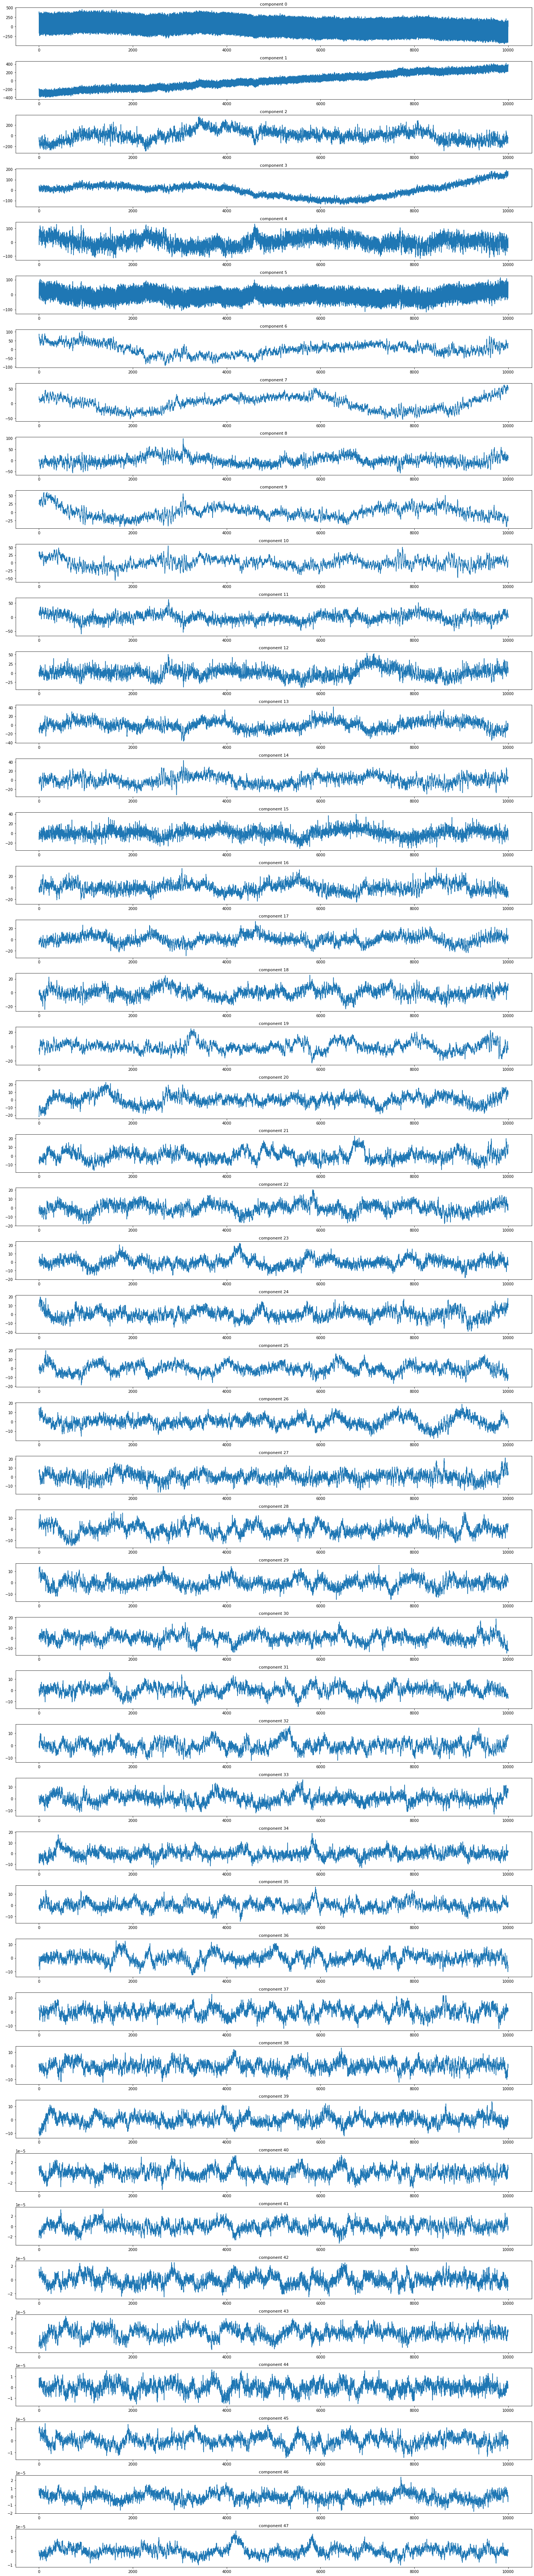

In [9]:
# Signals after remove blink signals
fig, ax = plt.subplots(48, 1, figsize=(20, 96))
for j in range(0, 48):
    ax[j].set_title("component {}".format(j), fontsize=11)
    ax[j].plot(reconstructed_data[:,j])

fig.tight_layout()
plt.show()

#### Grading:

- 8/10 points are awarded for completing all the tasks and giving proper answers to questions.
- 2/10 points are awarded for the quality of reporting, be sure to give explanations and comments to your solutions.
- +1 extra point may be awarded for the extra work performed, be creative.